## Model Selection using RFE (Biking Case Study)

#### **Problem Statement:**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

*Essentially, the company wants —*

1.   Which variables are significant in predicting the demand for shared bikes.
2.   How well those variables describe the bike demands

#### **Dataset characteristics / Attribute**
*day.csv have the following fields:*
	

* instant: record index
* dteday : date
* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2018, 1:2019)
* mnth : month ( 1 to 12)
* holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday*schedule)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 
		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : temperature in Celsius
* atemp: feeling temperature in Celsius
* hum: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered


## Step 1: Reading and Understanding the Data

In [1]:
# Connecting to Google Drive to get the required CSV File for future reference 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing all required python library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import sklearn
from sklearn.model_selection import  train_test_split
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# to display all the column 
pd.options.display.max_columns = 999

In [7]:
# Importing Housing.csv
biking_data = pd.read_csv('/content/drive/MyDrive/Upgrad/ML/Assignment/day.csv')

In [8]:
#Looking at the first five rows
biking_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [9]:
biking_data.shape

(730, 16)

Inspect the various aspects of the biking dataframe

In [10]:
biking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
biking_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
# unique values
biking_data.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### **Processing the Data Set**

In [13]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
biking_data["season"].replace([1,2,3,4],["spring","summer","fall","winter"], inplace=True)

##  year (0: 2018, 1:2019)
biking_data["yr"].replace([0,1],["2018","2019"], inplace=True)

##  weathersit 1: Clear , 2: Mist , 3: Light Snow , 4: Heavy Rain
biking_data["weathersit"].replace([1,2,3,4],["Clear","Mist","Light Snow","Heavy Rain" ], inplace=True)

## if day is neither weekend nor holiday is 1, otherwise is 0.
biking_data["holiday"].replace([0,1],["No","Yes"], inplace=True)

## if day is neither weekend nor holiday is 1, otherwise is 0.
biking_data["workingday"].replace([0,1],["No","Yes"], inplace=True)

##  Monday to Sunday
biking_data["weekday"].replace([0,1,2,3,4,5,6],["Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday","Monday" ], inplace=True)


In [14]:
biking_data[["dteday","season","yr","weathersit","weekday","holiday", "workingday" ]].head(20)

,dteday,season,yr,weathersit,weekday,holiday,workingday
0,01-01-2018,spring,2018,Mist,Monday,No,No
1,02-01-2018,spring,2018,Mist,Tuesday,No,No
2,03-01-2018,spring,2018,Clear,Wednesday,No,Yes
3,04-01-2018,spring,2018,Clear,Thursday,No,Yes
4,05-01-2018,spring,2018,Clear,Friday,No,Yes
5,06-01-2018,spring,2018,Clear,Saturday,No,Yes
6,07-01-2018,spring,2018,Mist,Sunday,No,Yes
7,08-01-2018,spring,2018,Mist,Monday,No,No
8,09-01-2018,spring,2018,Clear,Tuesday,No,No
9,10-01-2018,spring,2018,Clear,Wednesday,No,Yes


Interesting Monday and Tuesday is not a working day -- Low business day for biking company 

In [15]:
# Dropping column that is not useful for data analysis
biking_data = biking_data.drop(columns=['instant', 'dteday'])

## Step 2: Visualising the Data
Most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

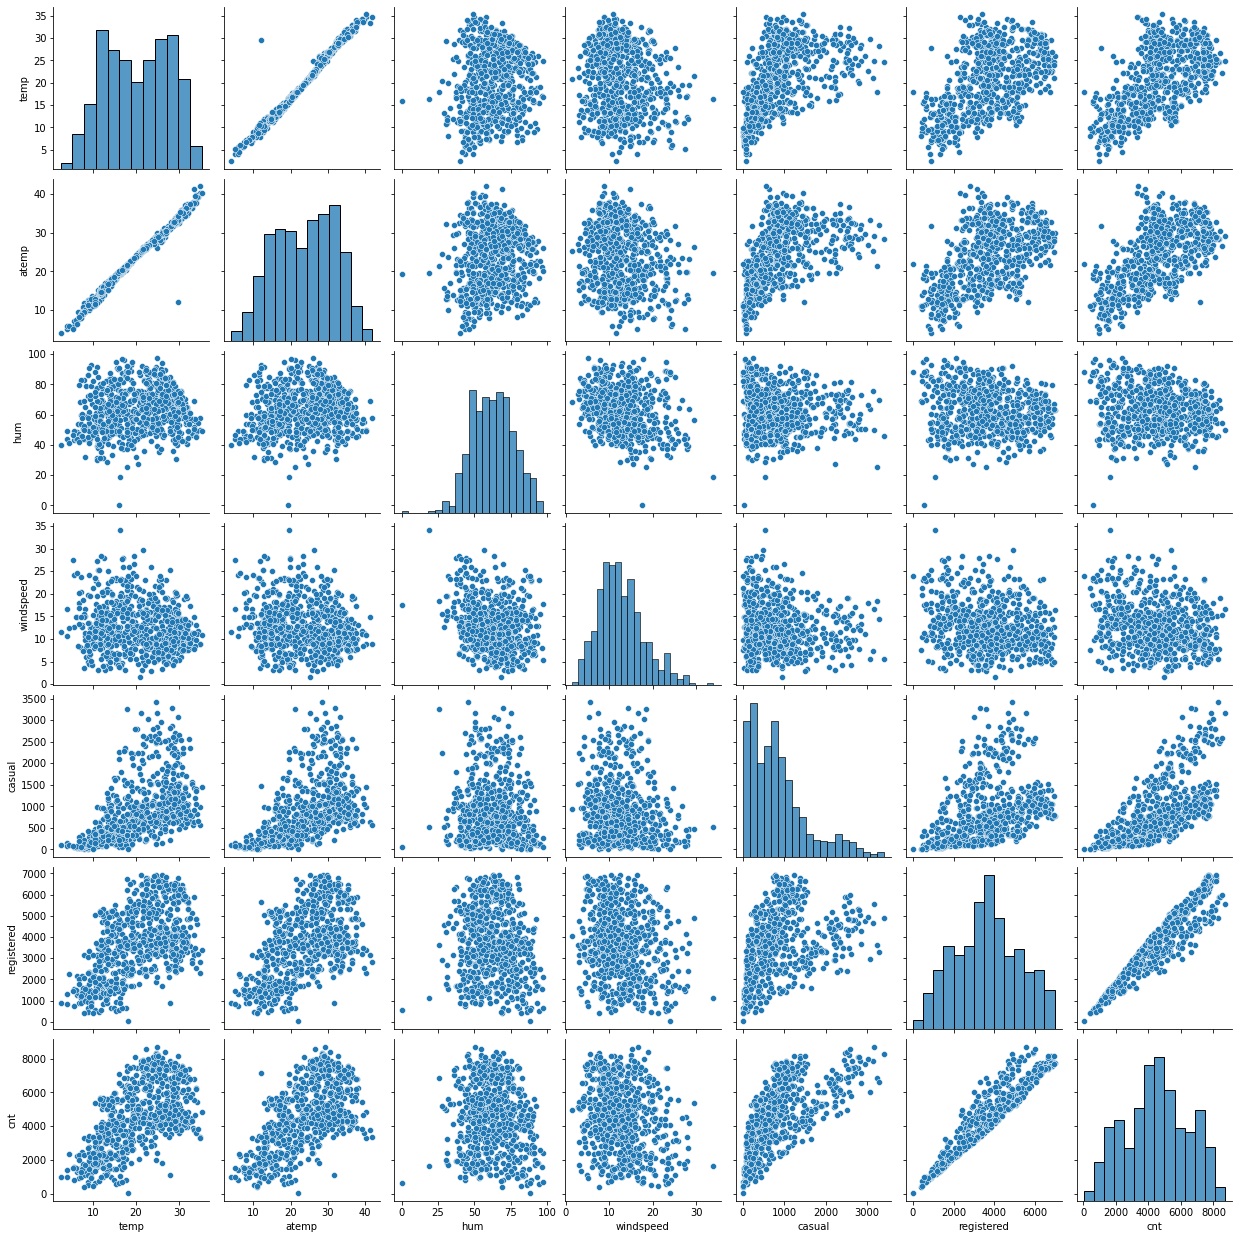

In [112]:
# visualising the numerical variable 
sns.pairplot(biking_data[['temp','atemp','hum','windspeed','casual','registered', 'cnt']])
plt.show()

**Data Observation from above chart**
Elimiating the highly correlated variables colunm ***atemp, casual ,registered*** and check how the data is looking , need to validate and  drop the column 

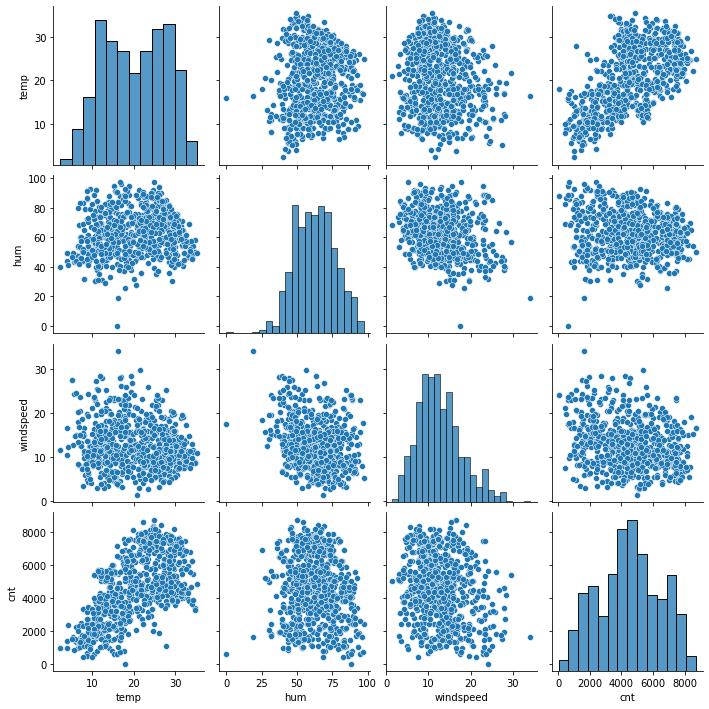

In [16]:
# visualising the numerical variable
# Elimiating the duplicate colunm 'atemp' 'casual','registered',
sns.pairplot(biking_data[['temp','hum','windspeed', 'cnt']])
plt.show()

#### Visualising Categorical Variables
There are a few categorical variables as well. Let's make a boxplot for some of these variables.

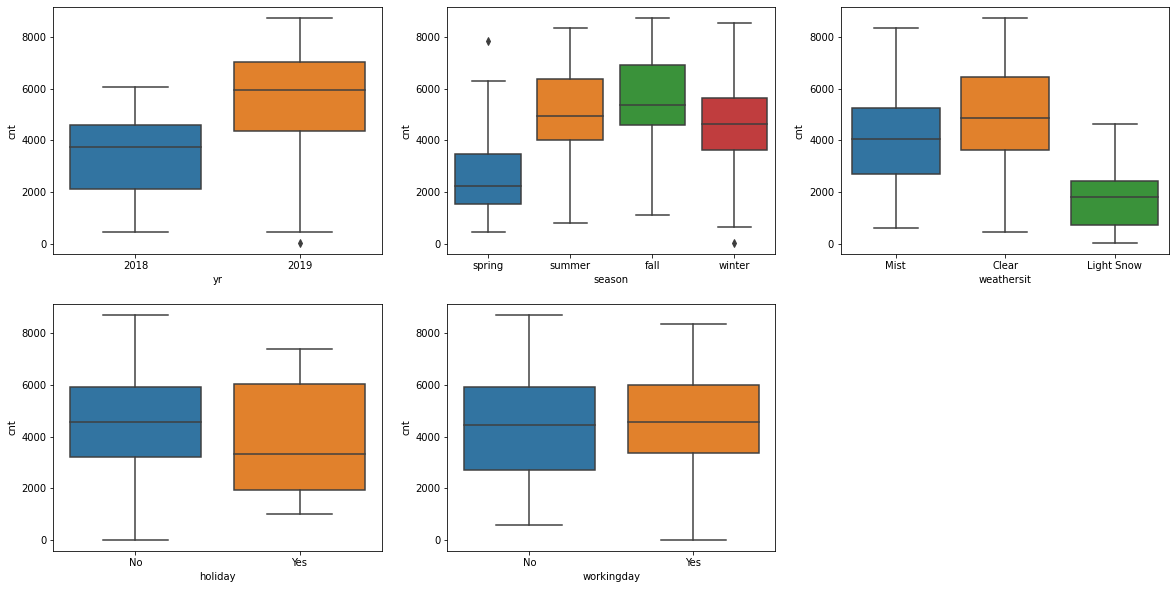

In [17]:
# Check the housing dataframe now

plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = biking_data)

plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = biking_data)

plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = biking_data)

plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = biking_data)

plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = biking_data)

plt.show()

#### Data Observation from above chart catagorical variable


1.   More bikes rented in 2019
2.   Most rent happens in Fall, Summer, winter and spring
3.   Most Rent in Clear and Mist weather 
4.   Less Rent happening in No holiday 
4.   Rent are much busy in working Days



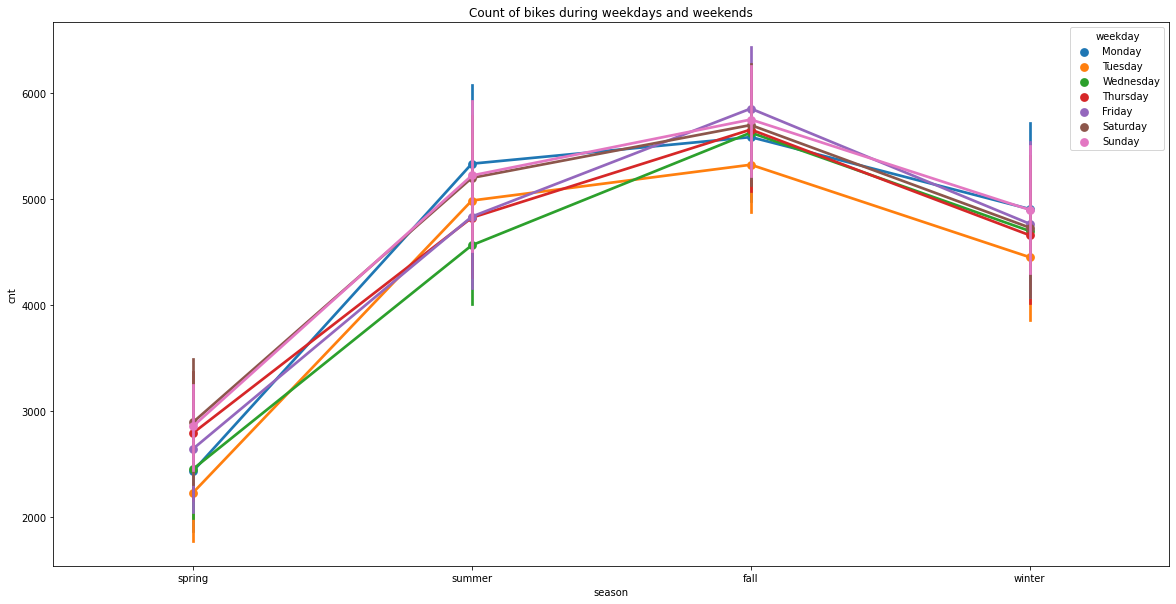

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=biking_data, x='season', y='cnt', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')
plt.show()

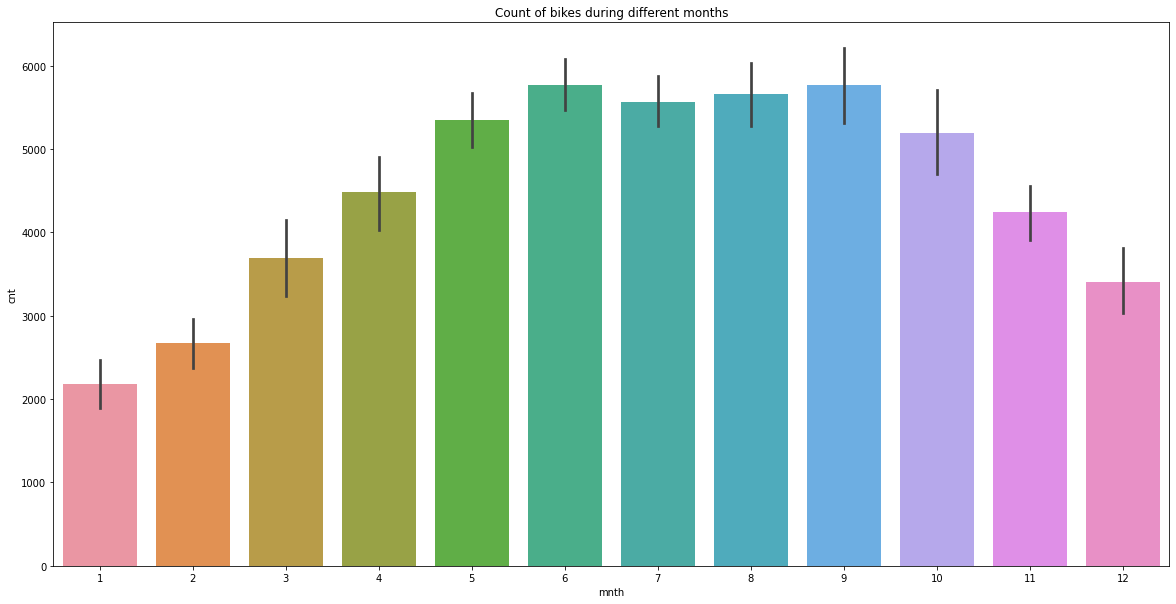

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=biking_data, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')
plt.show()

No bike moving months are Jan, Feb because of peak winter many be they can move the bike to other city ✈

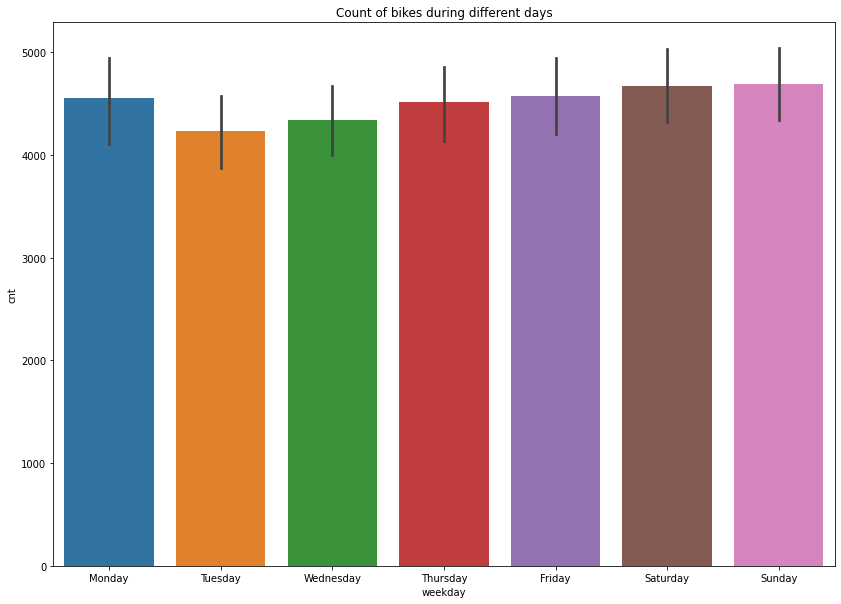

In [20]:
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=biking_data, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')
plt.show()

#### Data Observation from Weekeday chart


1.   Friday , Saturday, Sunday are busy days 
2.   Less Rental on Monday and Tuesday
3.   Monday and Tuesday is not the working day for Bike company 


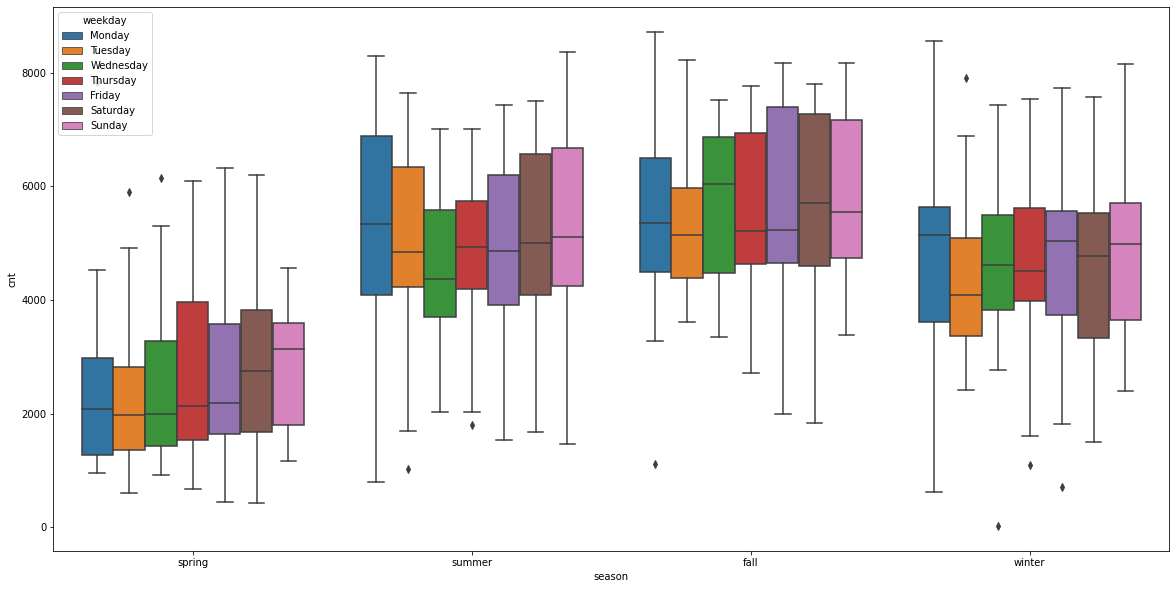

In [21]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weekday', data = biking_data)
plt.show()

#### Data Observation from Weekday and Season chart


1.   Very few rental od days on winter and summer 
2.   Looks like ibe day in winter is high rental might be because on nice weather


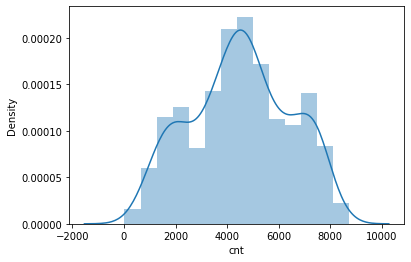

In [22]:
sns.distplot(biking_data["cnt"])
plt.show()

In [23]:
biking_data["cnt"] = np.log(biking_data["cnt"])

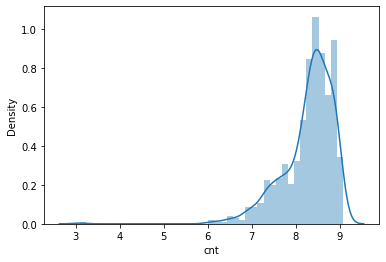

In [24]:
sns.distplot(biking_data["cnt"])
plt.show()

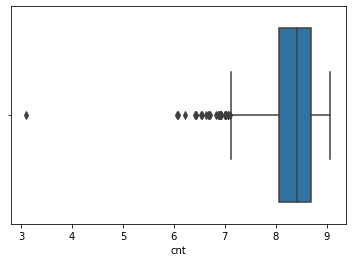

In [25]:
sns.boxplot(x="cnt",data=biking_data)
plt.show()

In [26]:
#Eliminare outliers (with residual less that stdev less than 3)
z = np.abs(stats.zscore(biking_data['cnt']))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
biking_data = biking_data[(z<=3)]

#find how many rows are left in the dataframe 
biking_data.shape


(722, 14)

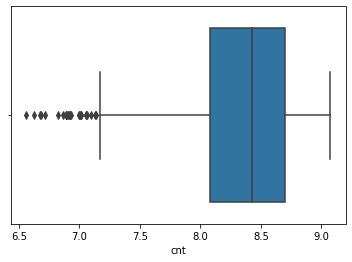

In [27]:
sns.boxplot(x="cnt",data=biking_data)
plt.show()

#### Coorelation Matrix

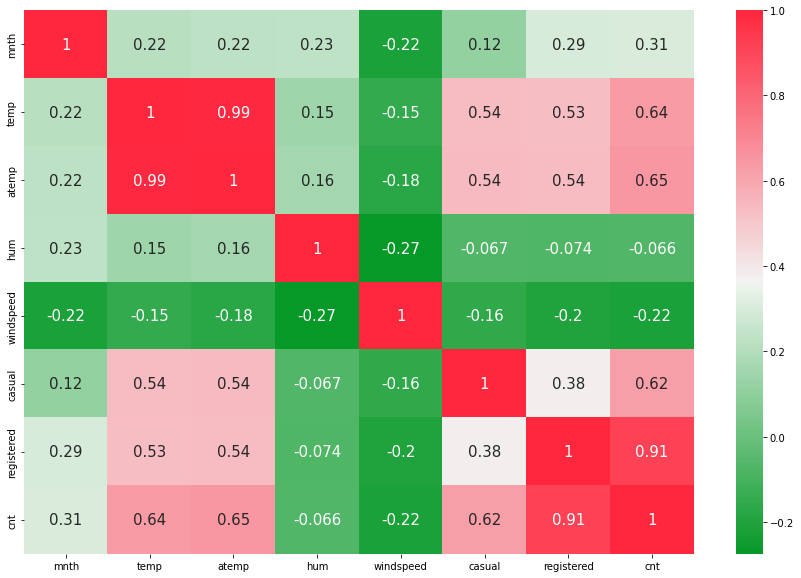

In [28]:
corr = biking_data.corr()
plt.figure(figsize=(15,10))
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(corr, annot=True, annot_kws={'size':15},cbar=True,cmap=rdgn)
plt.show()

#### Data Observation from above Heatmap


1.   Temp and atemp are highlt correlated to be removed 
2.   casual and registered are also highly with count and to removed 
2.   Temp, hum and windspeed helps in the bike count number 

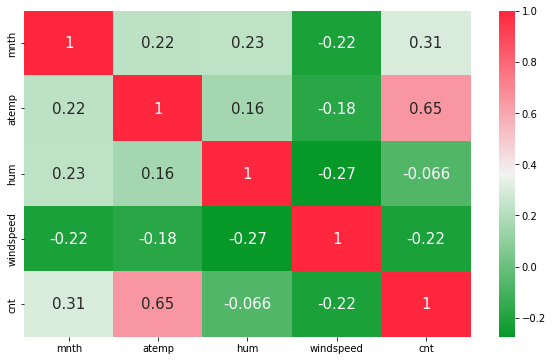

In [29]:
biking_data_test = biking_data.drop(columns=['temp', 'casual', 'registered'])

corr = biking_data_test.corr()
plt.figure(figsize=(10,6))
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(corr, annot=True, annot_kws={'size':15},cbar=True,cmap=rdgn)
plt.show()

## Step 3: Data Preparation

- You can see that your dataset has many columns that are categorical  values 

- We need to peroform One hot Encoding for dummy variable

#### **Dummy Variables (One hot Encoding)**

In [30]:
# change int columns to category
cols = ['season','mnth','holiday','weekday','workingday','weathersit','yr']

for col in cols:
    biking_data_test[col] = biking_data_test[col].astype('category')
biking_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      722 non-null    category
 1   yr          722 non-null    category
 2   mnth        722 non-null    category
 3   holiday     722 non-null    category
 4   weekday     722 non-null    category
 5   workingday  722 non-null    category
 6   weathersit  722 non-null    category
 7   atemp       722 non-null    float64 
 8   hum         722 non-null    float64 
 9   windspeed   722 non-null    float64 
 10  cnt         722 non-null    float64 
dtypes: category(7), float64(4)
memory usage: 34.6 KB


In [31]:
pd.get_dummies(biking_data['season'], prefix='season', drop_first=True)

,season_spring,season_summer,season_winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [32]:

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','mnth','holiday','weekday','workingday','weathersit','yr']

for col in cols:
    biking_data_test = one_hot_encoding(biking_data_test, col)
biking_data_test.head()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
0,18.18125,80.5833,10.749882,6.892642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,17.68695,69.6087,16.652113,6.685861,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,9.47025,43.7273,16.636703,7.207119,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,10.60610,59.0435,10.739832,7.353722,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,11.46350,43.6957,12.522300,7.377759,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [33]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
biking_train, biking_test = train_test_split(biking_data_test, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
print(biking_train.shape)
print(biking_test.shape)

(505, 29)
(217, 29)


In [35]:
biking_train.head()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
728,11.58500,48.3333,23.500518,7.493317,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
478,20.26415,45.4167,16.708661,8.636397,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
116,28.75710,83.5417,20.917400,8.261526,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
579,36.14335,64.2500,14.458064,8.878358,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
496,27.24085,48.0417,8.249911,8.913147,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

In [36]:
from sklearn.preprocessing import MinMaxScaler

# 1. Instantiate an object 
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed','cnt']

biking_train[num_vars] = scaler.fit_transform(biking_train[num_vars])

In [37]:
biking_train.head()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
728,0.204242,0.287484,0.822447,0.354647,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
478,0.436522,0.244114,0.568544,0.821726,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
116,0.663818,0.811029,0.725881,0.668548,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
579,0.861496,0.524164,0.484409,0.920595,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
496,0.623239,0.283148,0.252326,0.934810,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


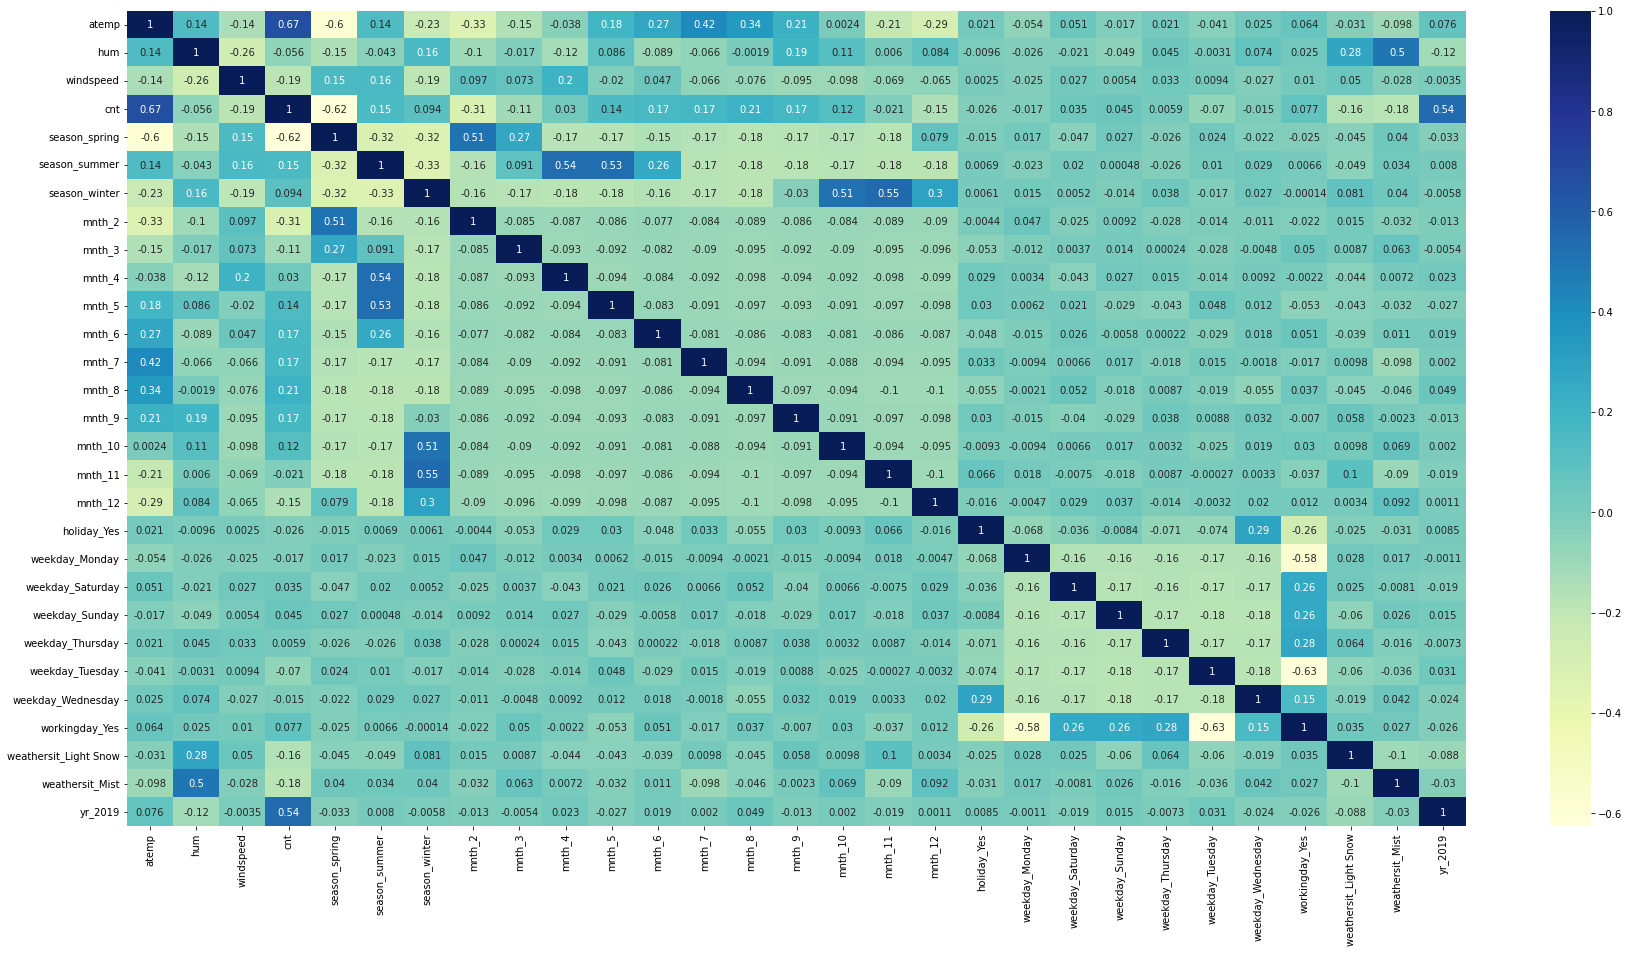

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(biking_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `count` seems to the correlated to `atemp` the most. Let's see a pairplot for `count` vs `atemp`.

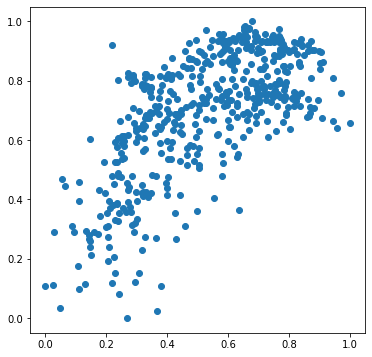

In [39]:
plt.figure(figsize=[6,6])
plt.scatter(biking_train.atemp, biking_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [40]:
y_train = biking_train.pop('cnt')
X_train = biking_train

In [41]:
X_train.head()

,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
728,0.204242,0.287484,0.822447,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
478,0.436522,0.244114,0.568544,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
116,0.663818,0.811029,0.725881,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
579,0.861496,0.524164,0.484409,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
496,0.623239,0.283148,0.252326,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [42]:
y_train.head()

728    0.354647
478    0.821726
116    0.668548
579    0.920595
496    0.934810
Name: cnt, dtype: float64

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [43]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [44]:
# Check the parameters obtained

lr.params

const    0.351906
atemp    0.647228
dtype: float64

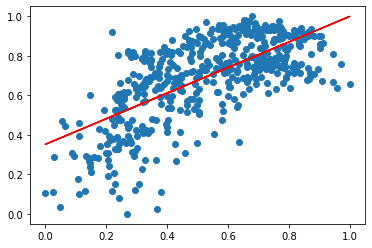

In [45]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1],  0.351906 + 0.647228*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [46]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     406.0
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.24e-66
Time:                        02:16:21   Log-Likelihood:                 221.62
No. Observations:                 505   AIC:                            -439.2
Df Residuals:                     503   BIC:                            -430.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3519      0.018     19.228      0.0

### Adding another variable

The R-squared value obtained is `0.418`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `yr_2019`.

In [47]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr_2019']]

In [48]:
print(y_train.head())
print("*************************")
print("*************************")
print(X_train_lm.head())

728    0.354647
478    0.821726
116    0.668548
579    0.920595
496    0.934810
Name: cnt, dtype: float64
*************************
*************************
        atemp  yr_2019
728  0.204242        1
478  0.436522        1
116  0.663818        0
579  0.861496        1
496  0.623239        1


In [49]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const      0.266483
atemp      0.610954
yr_2019    0.205416
dtype: float64

In [50]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     545.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.23e-126
Time:                        02:16:41   Log-Likelihood:                 363.86
No. Observations:                 505   AIC:                            -721.7
Df Residuals:                     502   BIC:                            -709.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2665      0.015     18.377      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [51]:
biking_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [52]:
X_train.head()

,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
728,0.204242,0.287484,0.822447,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
478,0.436522,0.244114,0.568544,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
116,0.663818,0.811029,0.725881,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
579,0.861496,0.524164,0.484409,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
496,0.623239,0.283148,0.252326,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [53]:
#Build a linear model
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                    0.294767
atemp                    0.480751
hum                     -0.090435
windspeed               -0.078348
season_spring           -0.105466
season_summer           -0.020423
season_winter            0.115308
mnth_2                   0.047365
mnth_3                   0.104724
mnth_4                   0.097205
mnth_5                   0.120167
mnth_6                   0.074306
mnth_7                   0.011334
mnth_8                   0.048908
mnth_9                   0.088325
mnth_10                  0.023986
mnth_11                 -0.001152
mnth_12                  0.015145
holiday_Yes              0.041488
weekday_Monday           0.094914
weekday_Saturday        -0.004722
weekday_Sunday           0.014841
weekday_Thursday        -0.012995
weekday_Tuesday          0.058065
weekday_Wednesday       -0.014738
workingday_Yes           0.100300
weathersit_Light Snow   -0.165891
weathersit_Mist         -0.041187
yr_2019                  0.198113
dtype: float64

In [54]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     92.62
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          9.98e-171
Time:                        02:16:55   Log-Likelihood:                 534.63
No. Observations:                 505   AIC:                            -1013.
Df Residuals:                     477   BIC:                            -895.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

*Maybe we could drop some?*

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
X_train.columns

Index(['atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_Yes', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday_Yes', 'weathersit_Light Snow', 'weathersit_Mist',
       'yr_2019'],
      dtype='object')

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,workingday_Yes,69.50
22,weekday_Tuesday,15.63
18,weekday_Monday,13.38
3,season_spring,10.76
5,season_winter,9.49
4,season_summer,9.02
12,mnth_8,8.88
11,mnth_7,8.77
9,mnth_5,6.89
13,mnth_9,6.81


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `mnth_11` has a significantly high VIF (`5.33`) and a high p-value (`0.970`) as well. Hence, this variable isn't of much use and should be dropped.

In [59]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('mnth_11', axis=1)

In [60]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [61]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     96.38
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.01e-171
Time:                        02:17:49   Log-Likelihood:                 534.63
No. Observations:                 505   AIC:                            -1015.
Df Residuals:                     478   BIC:                            -901.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,workingday_Yes,57.95
21,weekday_Tuesday,13.07
17,weekday_Monday,11.16
3,season_spring,9.33
5,season_winter,8.79
4,season_summer,8.61
12,mnth_8,6.62
11,mnth_7,6.61
9,mnth_5,5.86
0,atemp,5.72


In [63]:
# Dropping highly correlated variables and insignificant variables
# High p-value (>0.05) and high VIF (> 5) 
X = X.drop('mnth_7', axis=1)
X = X.drop('weekday_Saturday', axis=1)
X = X.drop('season_summer', axis=1)


#Low PValue and High VIF
X = X.drop('workingday_Yes', axis=1)
X = X.drop('weekday_Monday', axis=1)
X = X.drop('weekday_Thursday', axis=1)

X = X.drop('hum', axis=1)

X = X.drop('mnth_10', axis=1)
X = X.drop('mnth_12', axis=1)

X = X.drop('weekday_Wednesday', axis=1)

X = X.drop('windspeed', axis=1)        
X = X.drop('atemp', axis=1)        


In [64]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     94.61
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          7.77e-134
Time:                        02:18:05   Log-Likelihood:                 415.99
No. Observations:                 505   AIC:                            -800.0
Df Residuals:                     489   BIC:                            -732.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.66

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season_spring,2.15
2,mnth_2,1.57
13,weathersit_Mist,1.53
1,season_winter,1.45
3,mnth_3,1.29
11,weekday_Tuesday,1.21
10,weekday_Sunday,1.19
4,mnth_4,1.17
7,mnth_8,1.16
5,mnth_5,1.14


***Dropping the variable thats not helping the model*** 


- High p-value (>0.05) and high VIF (> 5) 
- High Low"
 ○ High P, low VIF 
 ○ Low P, hing VIF 
- Low p , low VIF we keep

mnth_7 , weekday_Saturday , season_summer, workingday_Yes, weekday_Monday, 
weekday_Thursday, hum, mnth_10, mnth_12 , weekday_Wednesday

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [67]:
y_train_pred = lr_3.predict(X_train_lm)

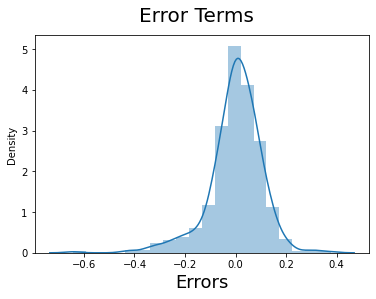

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

In [69]:
(y_train - y_train_pred)

728   -0.180561
478   -0.017931
116    0.110102
579    0.025875
496   -0.001227
         ...   
584    0.069620
56     0.000848
356    0.042430
84    -0.239740
526    0.015600
Length: 505, dtype: float64

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [70]:
biking_test[num_vars] = scaler.transform(biking_test[num_vars])
biking_test.head()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
203,0.970448,0.312268,0.272584,0.601370,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
493,0.634223,0.675341,0.485962,0.749210,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
371,0.417113,0.359356,0.381631,0.731868,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
627,0.606345,0.488228,0.239888,0.950510,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
643,0.614814,0.556382,0.615236,0.963276,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [71]:
biking_test.describe()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.543553,0.477320,0.437088,0.678552,0.253456,0.267281,0.225806,0.087558,0.082949,0.073733,0.087558,0.115207,0.096774,0.073733,0.078341,0.087558,0.064516,0.064516,0.027650,0.170507,0.147465,0.129032,0.142857,0.124424,0.133641,0.677419,0.027650,0.304147,0.488479
std,0.218788,0.215887,0.207526,0.214837,0.435996,0.443564,0.419079,0.283304,0.276443,0.261940,0.283304,0.320010,0.296334,0.261940,0.269329,0.283304,0.246238,0.246238,0.164346,0.376947,0.355389,0.336011,0.350736,0.330828,0.341052,0.468545,0.164346,0.461109,0.501023
min,0.052001,-0.151796,0.049875,-0.027457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.364725,0.312268,0.292840,0.591168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.573409,0.480174,0.406523,0.726317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.719568,0.653655,0.526498,0.828560,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.019437,1.014870,1.214955,0.992475,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y_test = biking_test.pop('cnt')
X_test = biking_test

In [73]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)
X_test_m4.head()

,const,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist,yr_2019
203,1.0,0.970448,0.312268,0.272584,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
493,1.0,0.634223,0.675341,0.485962,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
371,1.0,0.417113,0.359356,0.381631,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
627,1.0,0.606345,0.488228,0.239888,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
643,1.0,0.614814,0.556382,0.615236,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [74]:
# Removing all the not required column 
X_test_m4 = X_test_m4.drop(["mnth_7", "weekday_Saturday", "season_summer", "workingday_Yes", "weekday_Monday", "weekday_Thursday", "hum", "mnth_10", "mnth_12", "weekday_Wednesday", "windspeed", "atemp"], axis = 1)



In [75]:
X_test_m4 = X_test_m4.drop( "mnth_11", axis = 1)
                           

In [76]:
# Making predictions using the fourth model
y_pred_m4 = lr_3.predict(X_test_m4)

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y_true=y_test , y_pred=y_pred_m4)

0.7014003968325795

## **We can see that the equation of our best fitted line is:**

**bike Count =-0.2886×season_spring + -0.0046×season_winter + 0.0184×mnth_2 + 0.0672×mnth_3 + -0.0321×mnth_4  + 0.0643×mnth_5 + 0.0741×mnth_6 + 0.0703×mnth_8 + 0.0900×mnth_9 + -0.0546×holiday_Yes + 0.0238Xweekday_Sunday + -0.0479Xweekday_Tuesday  + -0.2435Xweathersit_Light_Snow +  -0.0711xweathersit_Mist +  0.2101xyr_2019**